In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
x=data['Income'].values
y=data['SpendingScore'].values

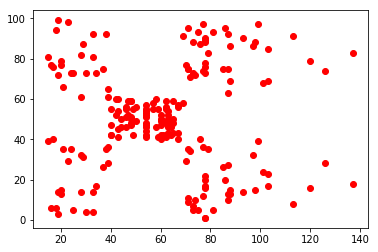

In [5]:
plt.scatter(x,y,color='red')
plt.show()

In [6]:
from sklearn.cluster import KMeans
sample=data[['Income','SpendingScore']]
km = KMeans(n_clusters=5)
km.fit(sample)
print('The centers of the clusters are : \n', km.cluster_centers_)
print('Cluster Labels : ',km.labels_)

The centers of the clusters are : 
 [[25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]]
Cluster Labels :  [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 3 1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 4 2 3 2 4 2 4 2 3 2 4 2 4 2 4 2 4 2 3 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


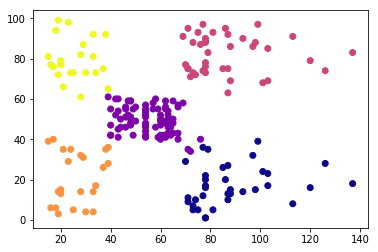

In [7]:
plt.scatter(x,y,c = km.labels_, cmap = 'plasma_r')

# ELBOW METHOD

In [8]:
x=data.iloc[:,3:5].values

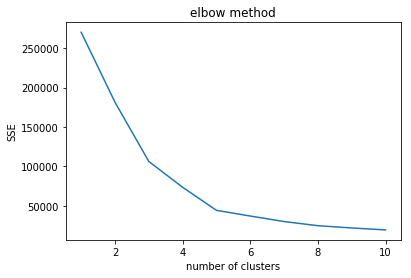

In [9]:
#to find optimal number of clusters
ls=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    ls.append(km.inertia_) #sum of squared distance of sample to their closest neighbor
plt.plot(range(1,11),ls)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.show()

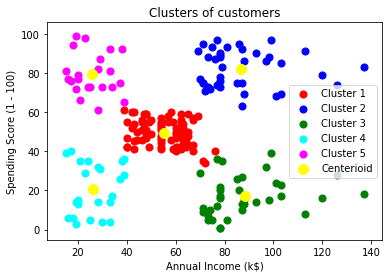

In [10]:
km = KMeans(n_clusters = 5)
y_means = km.fit_predict(x)#fit and label data pt to the clusters
#plt.scatter(cluster,data pt)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 99, c = 'yellow', label = 'Centerioid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()


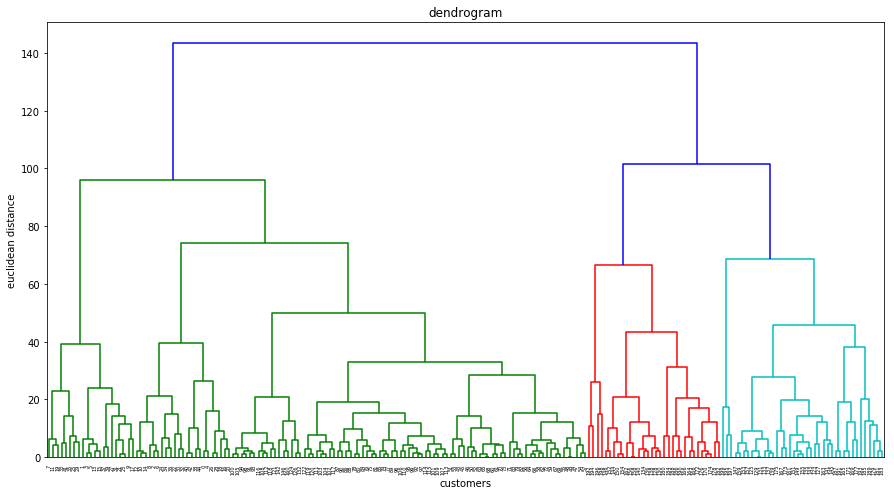

In [11]:
#using the dendrogram to find optimal number of clusers
import scipy.cluster.hierarchy as sch #
plt.figure(figsize=(15,8))
dendrogram=sch.dendrogram(sch.linkage(x,method='complete')) #how to draw dendrogram based on the method complete linkage
#sch.dendrogram(sch.linkage(x,method='ward')) #minimum variance method
plt.title('dendrogram')
plt.xlabel('customers')
plt.ylabel('euclidean distance')
plt.show()

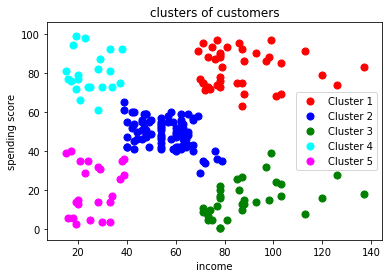

In [19]:
#fitting hierarchial clustering to dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete') #affinity means distance
y_hc=hc.fit_predict(x)
#visualizing the clusters
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
#no need centroid as its based on hierarchical
plt.title('clusters of customers')
plt.xlabel('income')
plt.ylabel('spending score')
plt.legend()
plt.show()

In [20]:
hc.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

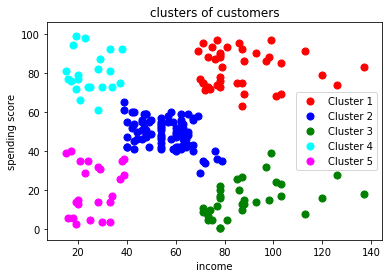

In [23]:
#fitting hierarchial clustering to dataset
from sklearn.cluster import AgglomerativeClustering
hc1=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward') #affinity means distance
y_hc1=hc.fit_predict(x)
#visualizing the clusters
plt.scatter(x[y_hc1 == 0, 0], x[y_hc1 == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc1 == 1, 0], x[y_hc1 == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc1 == 2, 0], x[y_hc1 == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc1 == 3, 0], x[y_hc1== 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc1 == 4, 0], x[y_hc1 == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
#no need centroid as its based on hierarchical
plt.title('clusters of customers')
plt.xlabel('income')
plt.ylabel('spending score')
plt.legend()
plt.show()

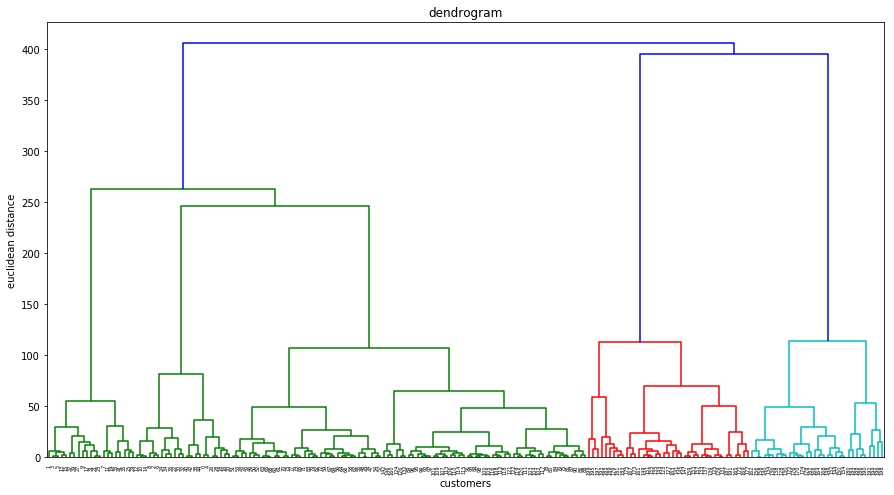

In [24]:
#using the dendrogram to find optimal number of clusers
import scipy.cluster.hierarchy as sch #
plt.figure(figsize=(15,8))
dendrogram=sch.dendrogram(sch.linkage(x,method='ward')) #how to draw dendrogram based on the method complete linkage
#sch.dendrogram(sch.linkage(x,method='ward')) #minimum variance method
plt.title('dendrogram')
plt.xlabel('customers')
plt.ylabel('euclidean distance')
plt.show()